# Выпускная квалификационная работа по курсу «Data Science»

В ходе выполнения ВКР требуется сделать:
* Изучить теоретические основы и методы решения поставленной задачи.
* Провести разведочный анализ предложенных данных. Необходимо нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.
* Провести предобработку данных (удаление шумов, нормализация и т.д.).
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 
* Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).
* Оценить точность модели на тренировочном и тестовом датасете. 
* Создать репозиторий в GitHub / GitLab и разместить там код исследования. Оформить файл README.

## Изучить теоретические основы и методы решения поставленной задачи

Имеется следующая информация по теоретическим основам поставленной задачи:

> Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).
> 
> Описание: 
> Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. 
> 
> При этом композиты являются монолитным материалом, т. е. компоненты материала неотделимы друг от друга без разрушения конструкции в целом. 
> 
> Их свойства определяются входящими в них компонентами, но отличаются от свойств компонентов, взятых в отдельности.
> 
> Композиционные материалы состоят из матрицы (основы) и наполнителя.
> 
> Матрица связывает композицию и в большей степени определяет технологические режимы получения материала и его эксплуатационные характеристики: рабочую температуру, плотность, удельную прочность, предел усталости.
> 
> Наполнитель, как правило, имеет высокие значения прочности, твердости и модуля упругости — значительно большие, чем показатели матрицы. Поэтому наполнитель является армирующим или упрочняющим элементом.
> 
> Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. 
> 
> Даже если мы знаем характеристики исходных компонентов, определить характеристики композита, состоящего из этих компонентов, достаточно проблематично. Для решения этой проблемы есть два пути: физические испытания образцов материалов, или прогнозирование характеристик. Суть прогнозирования заключается в симуляции представительного элемента объема композита, на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента). Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.
> 
> Кейс основан на реальных производственных задачах Центра НТИ «Цифровое материаловедение: новые материалы и вещества» (структурное подразделение МГТУ им. Н.Э. Баумана).

## Провести разведочный анализ предложенных данных

В этом разделе необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

> Имеется датасет со свойствами композита. Рассматривается базальтопластик с нашивками из углепластика.
>
> На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). 
>
> На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов.
>
> Датасет состоит из двух файлов - X_bp (составляющая из базальтопластика) и Х_nup (составляющая из углепластика). Дано, что объединение делать по индексу тип объединения INNER.

In [1]:
# Подключаю доступ к файлам данных для гугл драйв
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
# Пути для гугл драйв
# data_path = '/content/drive/MyDrive/Colab Notebooks/data/'
# models_path = '/content/drive/MyDrive/Colab Notebooks/models/'

In [3]:
# Пути для локального запуска
data_path = '../data/'
models_path = '../models/'

In [4]:
# Импортирую необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import pickle

In [5]:
# Определяю RANDOM_STATE для повторяемости результатов
RANDOM_STATE = 3128

In [6]:
# Загружаю исходные данные из файла X_bp
X_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [7]:
# Загружаю исходные данные из файла X_nup
X_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

X_bp содержит индекс + 10 признаков и 1023 строк.

X_nup содержит индекс + 3 признака и 1040 строк

Рассмотрю список признаков:

In [8]:
pd.DataFrame(X_bp.columns, columns=['X_bp признаки'])

X_bp признаки
0       Соотношение матрица-наполнитель
1                      Плотность, кг/м3
2                 модуль упругости, ГПа
3           Количество отвердителя, м.%
4       Содержание эпоксидных групп,%_2
5              Температура вспышки, С_2
6         Поверхностная плотность, г/м2
7  Модуль упругости при растяжении, ГПа
8         Прочность при растяжении, МПа
9               Потребление смолы, г/м2

In [9]:
pd.DataFrame(X_nup.columns, columns=['X_nup признаки'])

X_nup признаки
0  Угол нашивки, град
1         Шаг нашивки
2   Плотность нашивки

Дано, что это это единый набор данных, и он требует объединения с типом INNER. 

Но очень смущает, что таблицы имеют разное количество строк.

In [10]:
# Объединяю датасеты
df = X_bp.join(X_nup, how='inner')
df.shape

(1023, 13)

В датасете осталось 1023 строки, часть строк из таблицы X_nup была отброшена.

In [11]:
# Сохраню объединенные данные
df.to_excel(data_path + 'data_merged.xlsx')

In [12]:
# Посмотрю типы данных признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Все признаки имеют тип float64, признаков с типом "object" нет - значит нет строковых значений вместо чисел.

In [13]:
# Проверю на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

Известно, что датасет уже подготовлен. Поэтому отсутствие пропусков и значений ошибочных типов не удивляет.

In [14]:
# Посмотрю описательную статистику
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

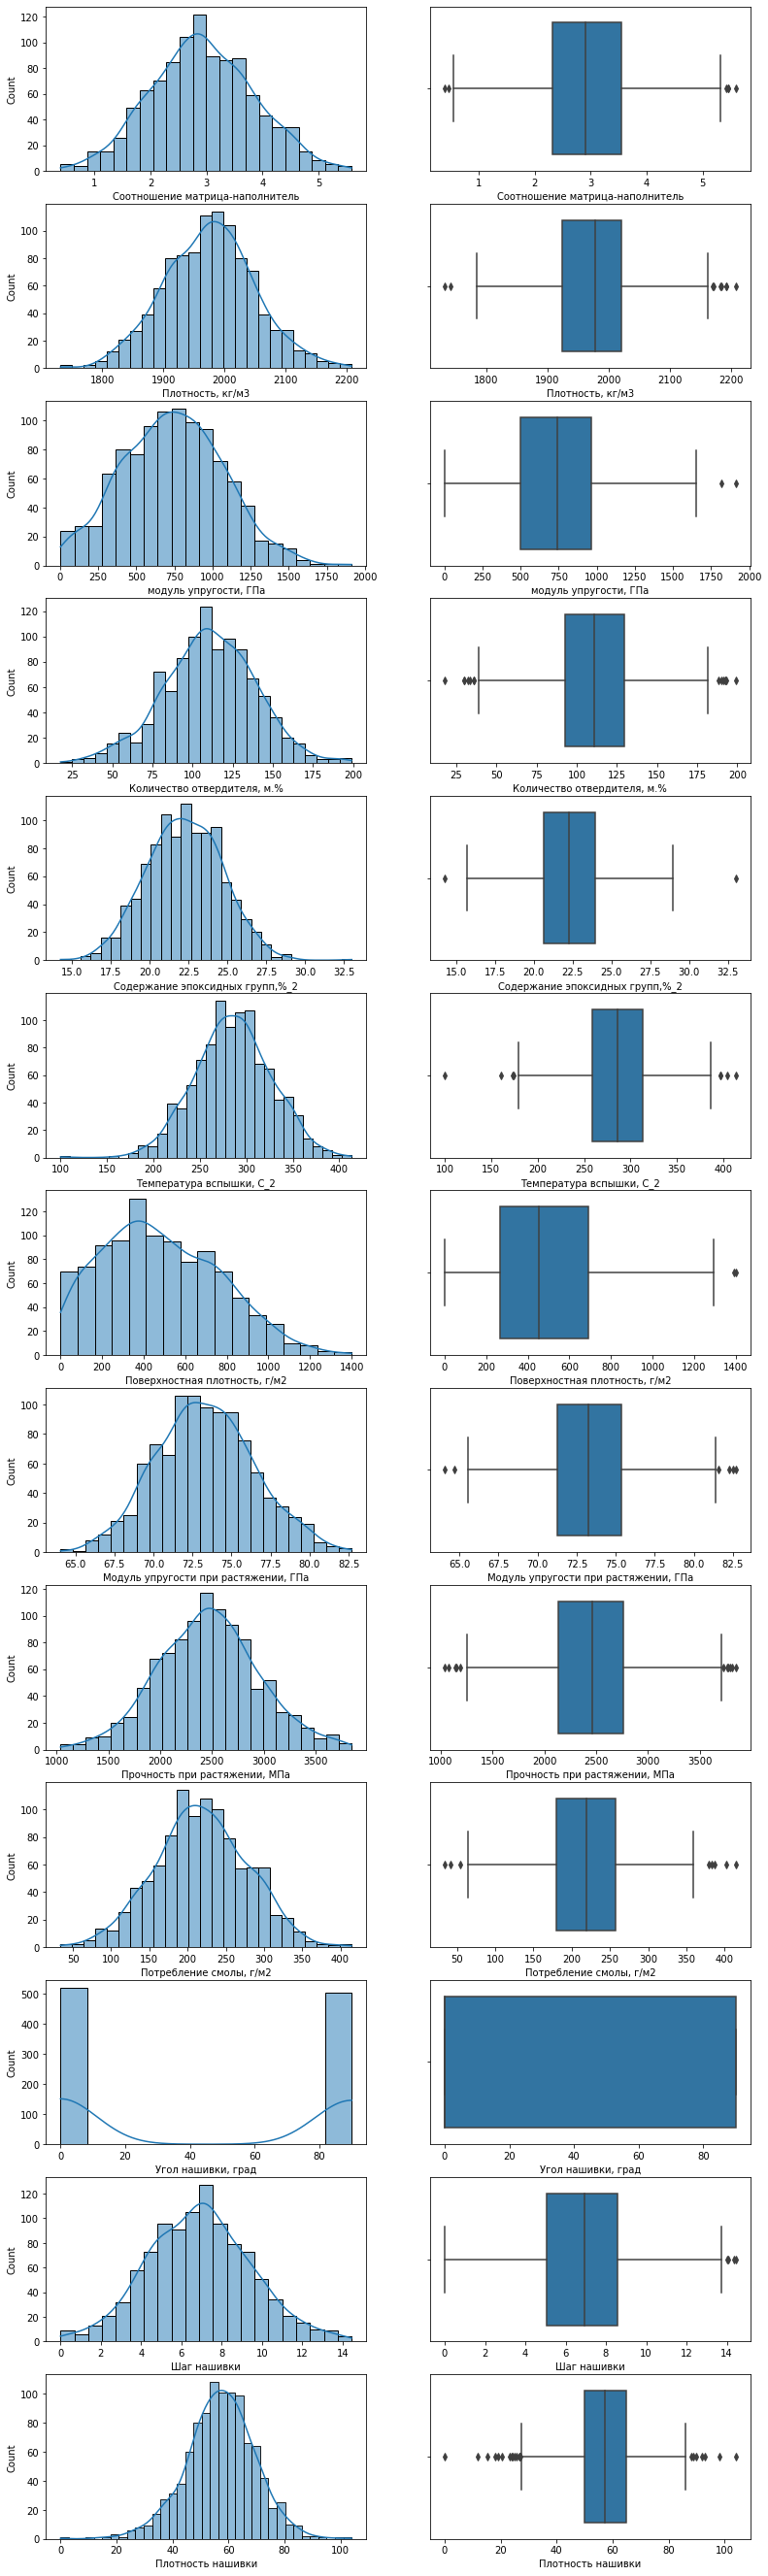

In [15]:
# Построю графики распределения переменных и "ящики с усами"
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

In [16]:
df['Угол нашивки, град'].unique() 

array([ 0., 90.])

Все признаки, кроме "Угол нашивки, град" имеют нормальное распределение.
Они количественные, вещественные. Принимают неотрицательные значения.

"Угол нашивки, град" принимает 2 значения. Можно превратить в бинарный признак.

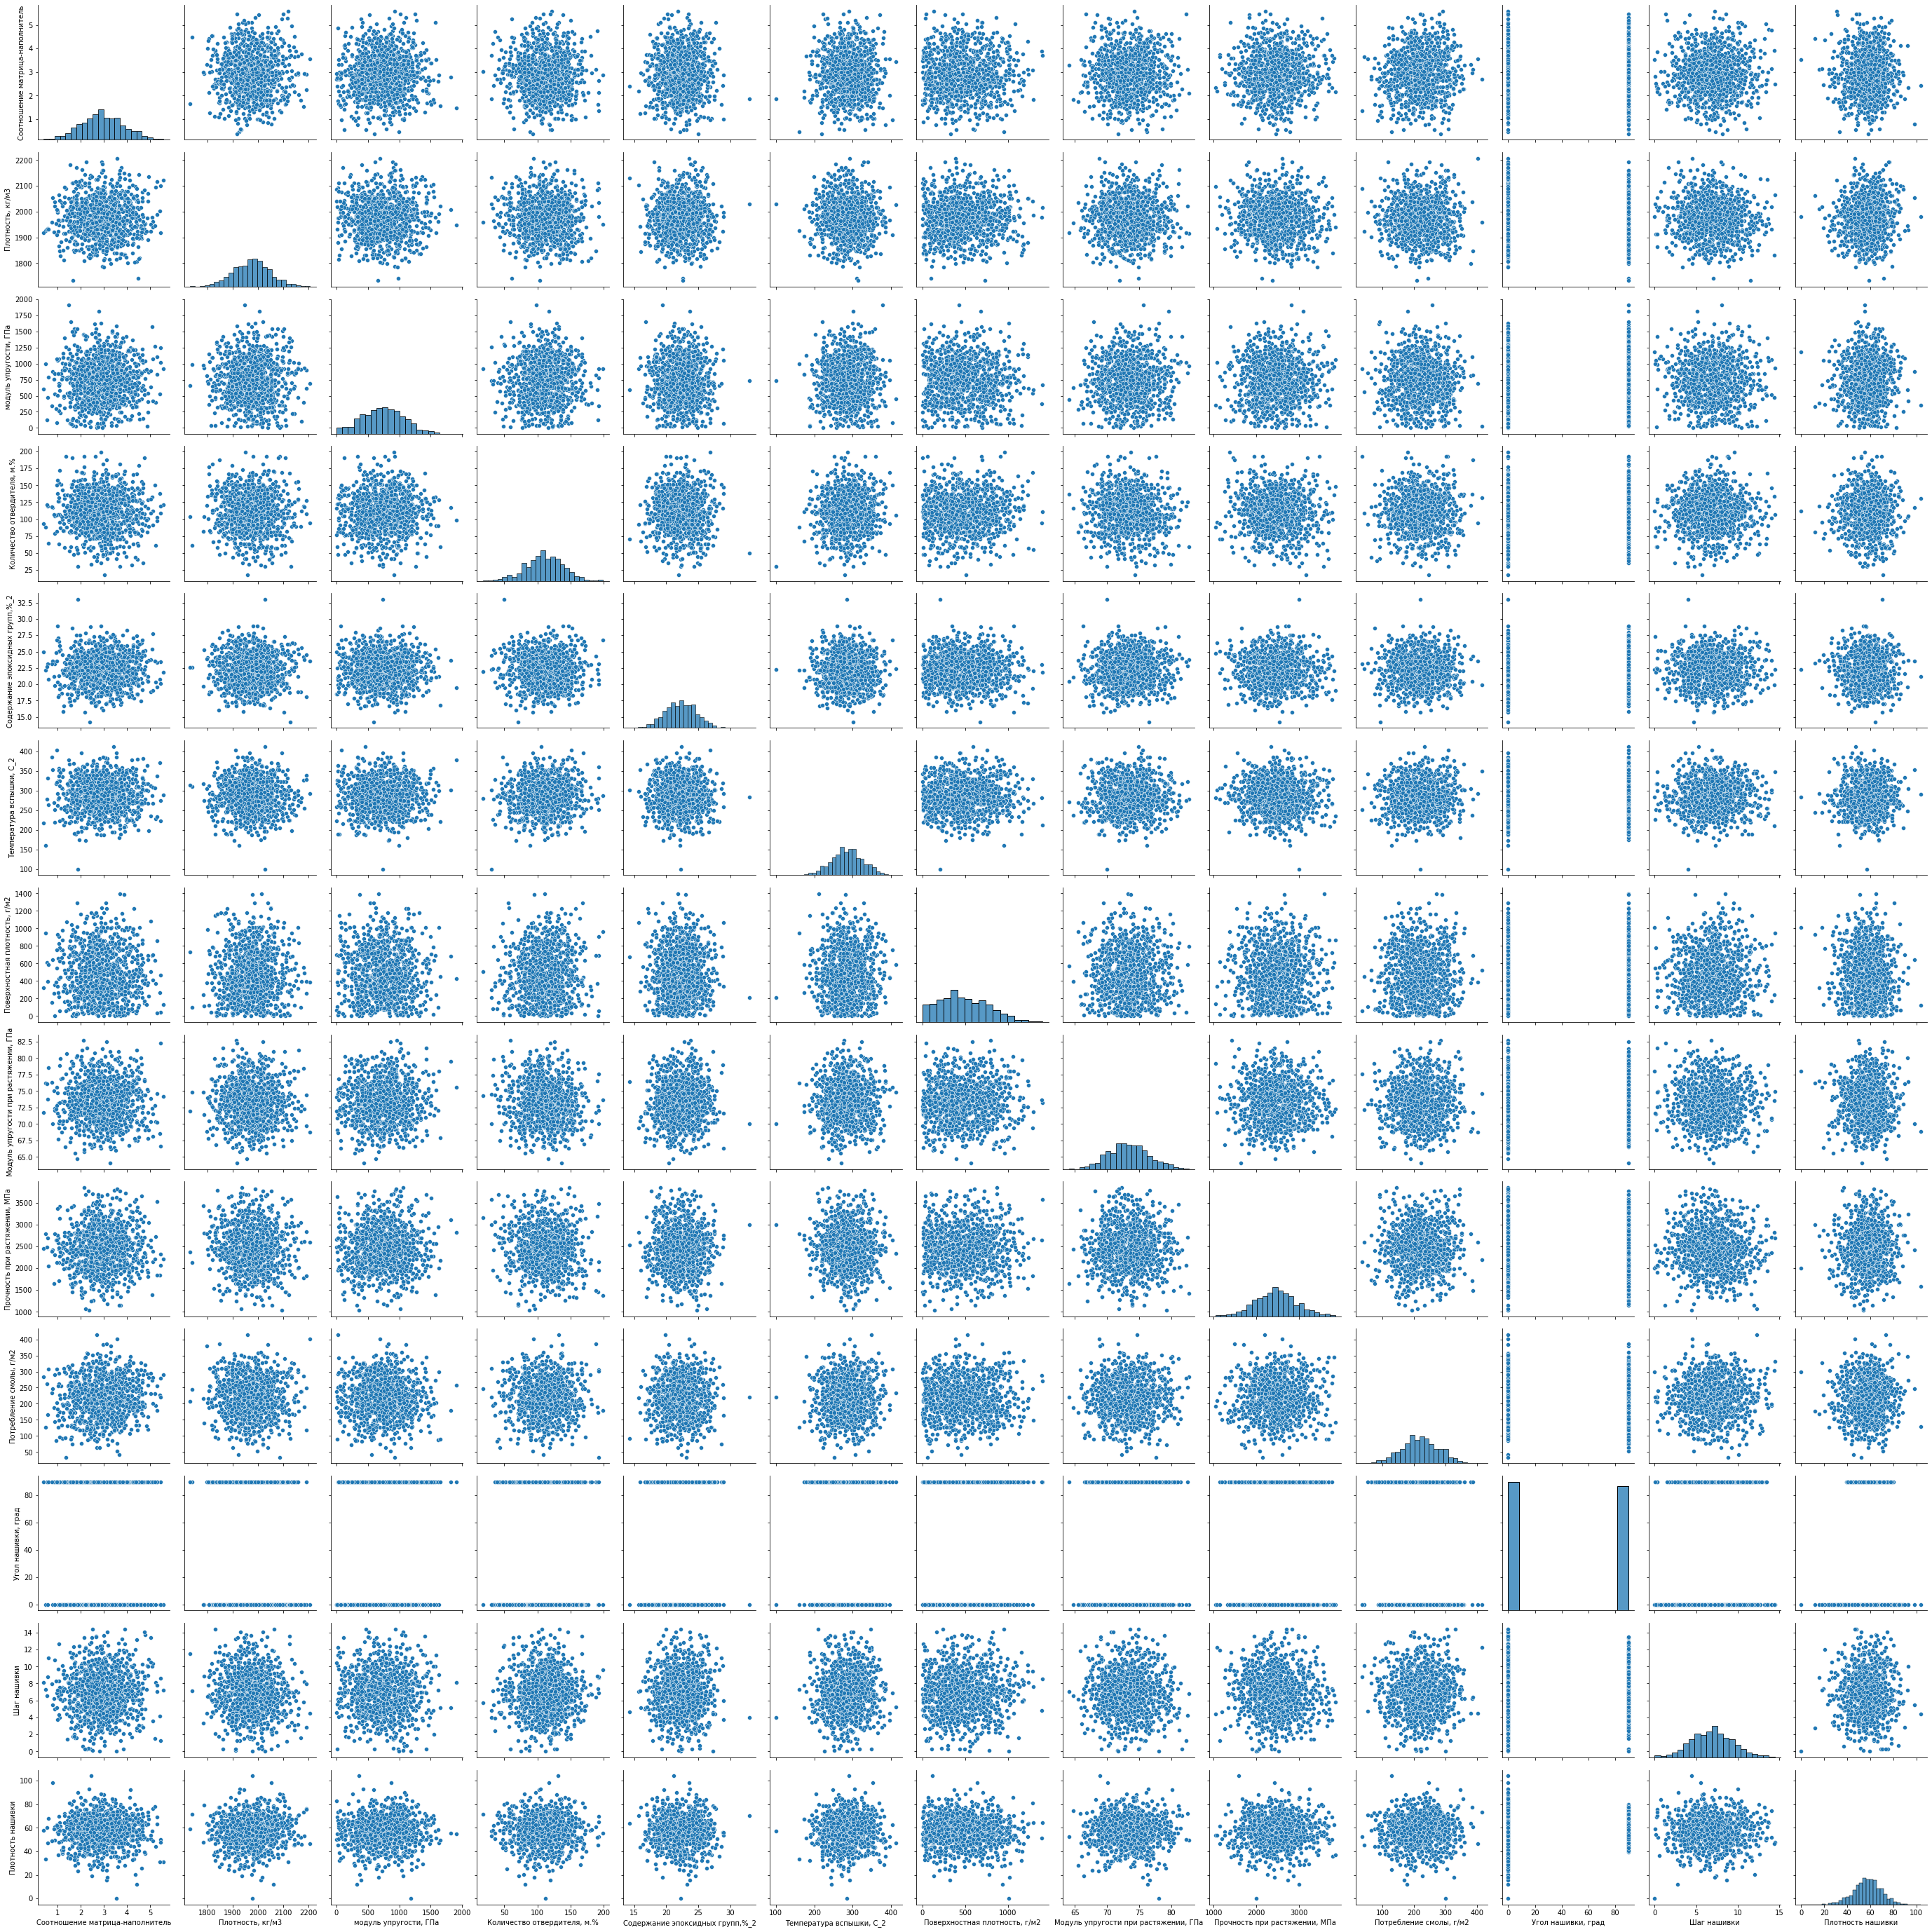

In [17]:
# Построю попарные графики рассеяния
sns.pairplot(df, height=3);

По графикам видно, что выбросы есть. Некоторые точки стоят очень далеко от общего облака.

Найду выбросы.

Для поиска выбросов есть разные методы: 3-х сигм или межквартильных расстояний. Экспериментирую, как они отработают на данном наборе данных.

Соотношение матрица-наполнитель: 3s=0 iq=6


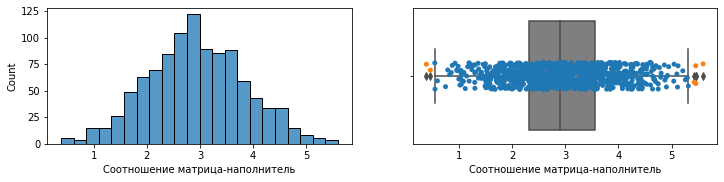

Плотность, кг/м3: 3s=3 iq=9


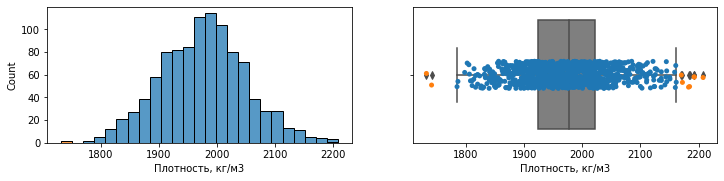

модуль упругости, ГПа: 3s=2 iq=2


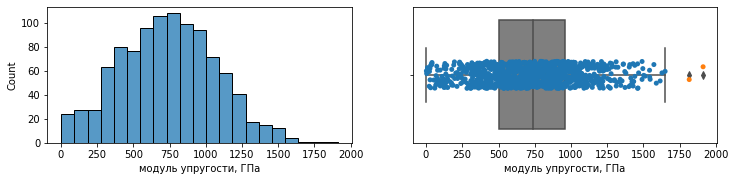

Количество отвердителя, м.%: 3s=2 iq=14


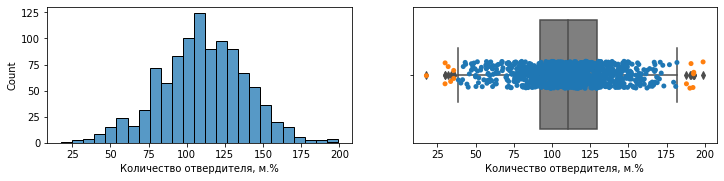

Содержание эпоксидных групп,%_2: 3s=2 iq=2


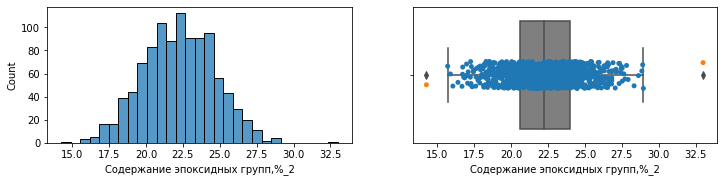

Температура вспышки, С_2: 3s=3 iq=8


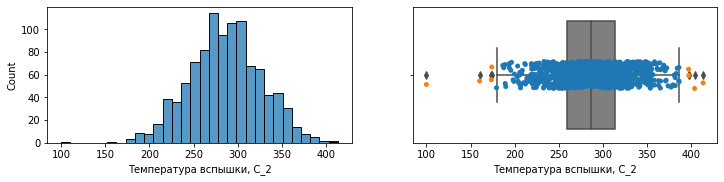

Поверхностная плотность, г/м2: 3s=2 iq=2


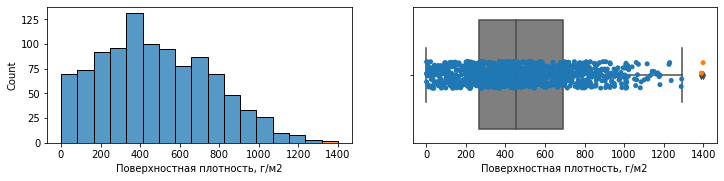

Модуль упругости при растяжении, ГПа: 3s=0 iq=6


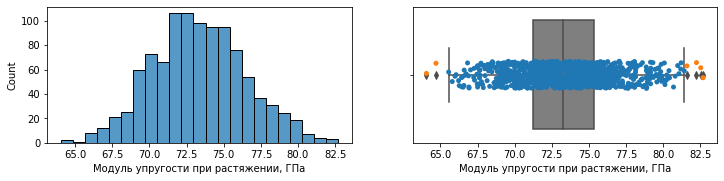

Прочность при растяжении, МПа: 3s=0 iq=11


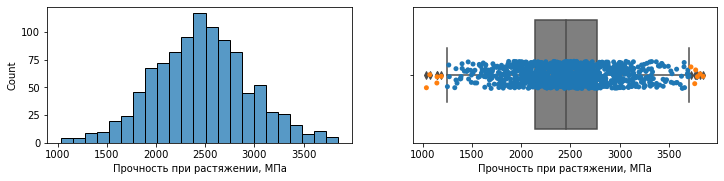

Потребление смолы, г/м2: 3s=3 iq=8


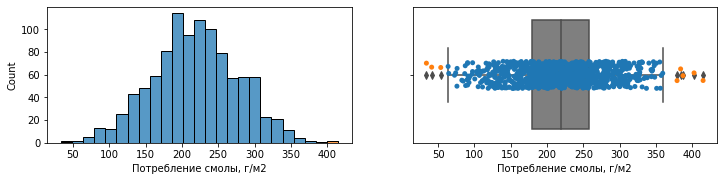

Угол нашивки, град: 3s=0 iq=0


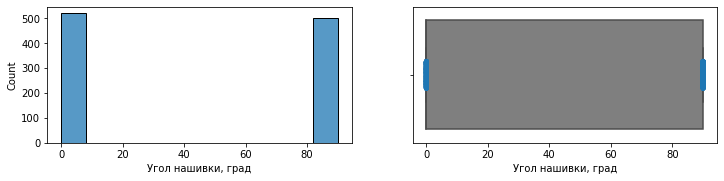

Шаг нашивки: 3s=0 iq=4


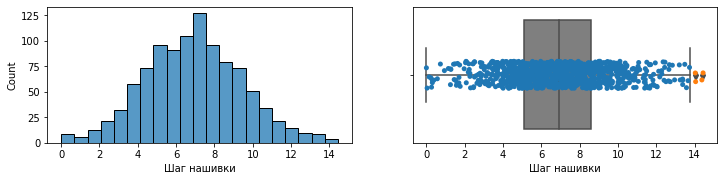

Плотность нашивки: 3s=7 iq=21


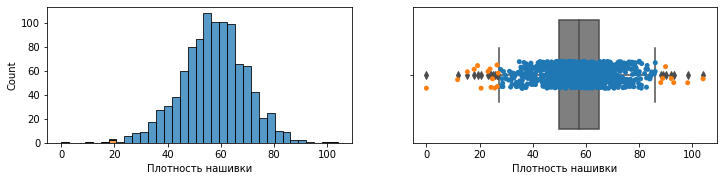

Метод 3-х сигм, выбросов: 24
Метод межквартильных расстояний, выбросов: 93


In [18]:
count_3s = 0
count_iq = 0
for column in df:
    d = df.loc[:, [column]]
    # методом 3-х сигм
    zscore = (df[column] - df[column].mean()) / df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
    # методом межквартильных расстояний
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (df[column] <= lower) | (df[column] >= upper)
    count_iq += d['iq'].sum()
    # визуализация выбросов
    print('{}: 3s={} iq={}'.format(column, d['3s'].sum(), d['iq'].sum()))
    fig, axes = plt.subplots(1, 2, figsize=(12, 2.5))
    sns.histplot(data=d, x=column, hue='3s', multiple='stack', legend=False, ax=axes[0])
    sns.boxplot(data=d, x=column, color='tab:gray', ax=axes[1])
    sns.stripplot(data=d[d['iq']==False], x=column, ax=axes[1])
    sns.stripplot(data=d[d['iq']==True], x=column, color='tab:orange', ax=axes[1])
    plt.show()

print('Метод 3-х сигм, выбросов:', count_3s)
print('Метод межквартильных расстояний, выбросов:', count_iq)

Вот что получилось:
* Метод 3-х сигм, выбросов по всем переменным: 24
* Метод межквартильных расстояний, выбросов по всем переменным: 93

На сырых данных я бы применила метод межквартильных расстояний, чтоб получить более "чистые" данные. Но раз датасет уже очищен от явного шума, применю метод 3-х сигм, чтобы потерять меньше значимой информации.

In [19]:
# Удалить выбросы методом 3-х сигм
outliers = pd.DataFrame(index=df.index)
for column in df:
    zscore = (df[column] - df[column].mean()) / df[column].std()
    outliers[column] = (zscore.abs() > 3)
df = df[outliers.sum(axis=1)==0]
df.shape

(1000, 13)

In [20]:
# Очищенные данные тоже стоит сохранить
df.to_excel(data_path + 'data_cleaned.xlsx')

Смущает то, что по внешнему виду графиков мы не видим никаких зависимостей между признаками. То, что входные переменные независимы друг от друга - это хорошо. Но выходые переменные должны как-то зависеть от входных, чтобы модель могла найти эту зависимость и использовать ее для предсказания.

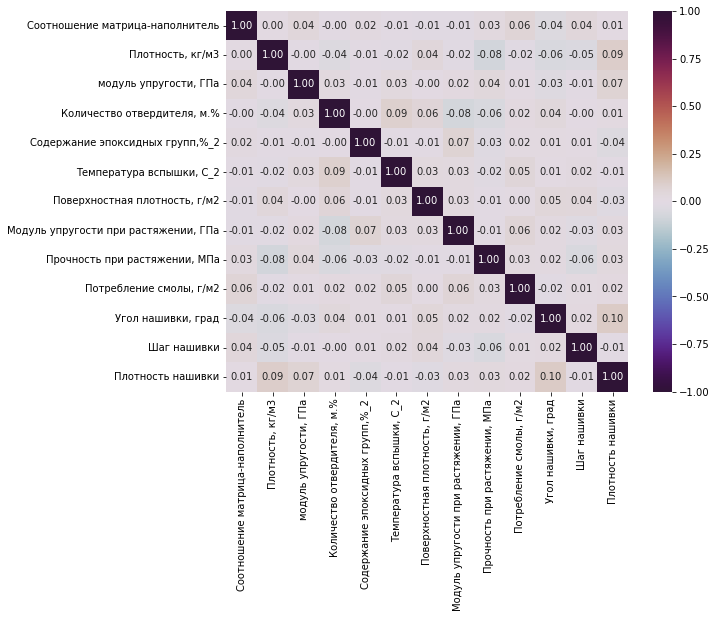

In [21]:
# Попробую рассмотреть матрицу корреляции.
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)
plt.show()

Коэффициенты корреляции, близкие к 0, показывают отсутствие линейной зависимости между признаками. Предполагаю, что применение линейных моделей регрессии не даст приемлемого результата.

## Обучить нескольких моделей

В этом разделе необходимо:
* 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
* Провести предобработку данных (нормализация и т.д.).
* При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
* Обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении.
* Написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель. 

In [22]:
# Загрузить данные, подготовленные на предыдущем шаге
df = pd.read_excel(data_path + 'data_cleaned.xlsx', index_col=0)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

### Нужно разделить данные на входные и выходные признаки.

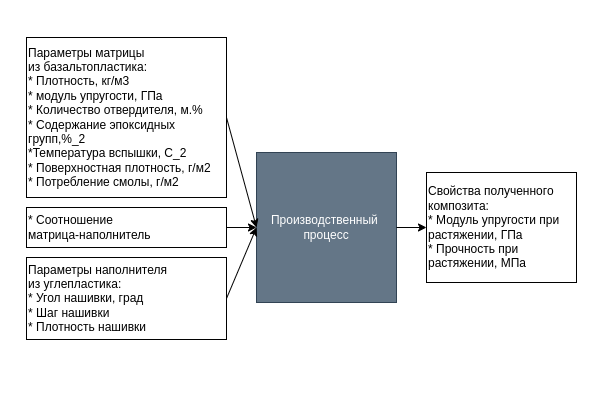

In [23]:
from IPython.display import Image
Image(filename='process.png')

Я поняла предметную область так, как показано на картинке выше. И поняла, что передо мой стоят 3 различных задачи:
1. Предсказать модуль упругости при растяжении (свойство композита), если известны параметры матрицы, параметры наполнителя, соотношение матрица-наполнитель.
2. Предсказать прочность при растяжении (свойство композита), если известны параметры матрицы, параметры наполнителя, соотношение матрица-наполнитель.
3. Предсказать соотношение-матрица наполнитель, если известны параметры матрицы, параметры наполнителя, желаемые свойства композита.

In [24]:
# Признаки для 1-й задачи
y1_columns = ['Модуль упругости при растяжении, ГПа']
x1_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y1 = df.loc[:, y1_columns]
x1 = df.loc[:, x1_columns]

In [25]:
# Признаки для 2-й задачи
y2_columns = ['Прочность при растяжении, МПа']
x2_columns = [
  'Соотношение матрица-наполнитель', 
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y2 = df.loc[:, y2_columns]
x2 = df.loc[:, x2_columns]

In [26]:
# Признаки для 3-й задачи
y3_columns = ['Соотношение матрица-наполнитель']
x3_columns = [
  'Плотность, кг/м3',
  'модуль упругости, ГПа', 
  'Количество отвердителя, м.%',
  'Содержание эпоксидных групп,%_2', 
  'Температура вспышки, С_2',
  'Поверхностная плотность, г/м2', 
  'Модуль упругости при растяжении, ГПа',
  'Прочность при растяжении, МПа', 
  'Потребление смолы, г/м2',
  'Угол нашивки, град', 
  'Шаг нашивки', 
  'Плотность нашивки'
]
y3 = df.loc[:, y3_columns]
x3 = df.loc[:, x3_columns]

### Препроцессинг

Далее необходимо выполнить препроцессинг. Его необходимо выполнять после разделения на тренировочную и тестовую выборку, как будто мы не знаем параметров тестовой выборки (минимум, максимум, матожидание, стандартное отклонение). 

Препроцессинг для категориальных и количественных признаков выполняем по-разному.

Категориальный признак один - 'Угол нашивки, град'. Он принимает значения 0 и 90. Использую OrdinalEncoder, чтобы признак принимал значения 0 и 1.

Вещественных количественных признаков у нас большинство. Можно применить нормализацию (приведение в диапазон от 0 до 1) или стандартизацию (приведение к матожиданию 0, стандартному отклонению 1). Использую стандартизацию и StandardScaler.

Также препроцессинг необходимо повторить в приложении для введенных данных. Поэтому удобно реализовать предварительную обработку с помощью ColumnTransformer. Создам объект preprocessor для каждой из 3-х задач.

Выходные переменные никак не изменяю.

In [27]:
# Разделю переменные на категориальные и численные
x_categorical = ['Угол нашивки, град']
x1_continuous = [column for column in x1_columns if column not in x_categorical]
x2_continuous = [column for column in x2_columns if column not in x_categorical]
x3_continuous = [column for column in x3_columns if column not in x_categorical]

In [28]:
# Препроцессор для 1-й задачи
preprocessor1 = ColumnTransformer(
    transformers=[
        ("continuous", StandardScaler(), x1_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
    ]
)

In [29]:
# Препроцессор для 2-й задачи
preprocessor2 = ColumnTransformer(
    transformers=[
        ("continuous", StandardScaler(), x2_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
    ]
)

In [30]:
# Препроцессор для 3-й задачи
preprocessor3 = ColumnTransformer(
    transformers=[
        ("continuous", StandardScaler(), x3_continuous),
        ("categorical", OrdinalEncoder(), x_categorical)
    ]
)

In [31]:
# Необходимо сравнить распределения признаков до и после обработки
# Сделаю вспомогательную функцию, чтобы описательная статистика отображалась одинаково
def show_statistics(d):
    return d.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

### Выбор модели

Какую модель использовать? Нужно попробовать разные. Для сравнения моделей использую несколько метрик. Для статистической устойчивости результатов использую кросс-валидацию. Оформлю запуск моделей, кросс-валидацию и получение метрик в виде вспомогательной функции.

In [32]:
def run_models(models, x, y):
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = ['r2', 
                'max_error', 
                'neg_root_mean_squared_error', 
                'neg_mean_absolute_error', 
                'neg_mean_absolute_percentage_error']
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MAPE'] = scores['test_neg_mean_absolute_percentage_error'].mean()
        stat.loc[model_name, 'max_error'] = scores['test_max_error'].mean()
    return stat

Для поиска параметров по сетке тоже сделаю вспомогательную функцию, чтобы везде использовалась одинаковые параметры и одинаково выводился результат.

In [33]:
def run_grid_search(model, params, x, y):
    pd.options.display.max_colwidth = 200
    stat = pd.DataFrame()
    cv = KFold(10, shuffle=True, random_state=RANDOM_STATE)
    scoring = 'neg_root_mean_squared_error'
    searcher = GridSearchCV(model, params, cv=cv, scoring=scoring)
    searcher.fit(x, y)
    stat.loc[:, 'params'] = searcher.cv_results_['params']
    stat.loc[:, 'RMSE'] = searcher.cv_results_['mean_test_score']
    stat.loc[:, 'rank'] = searcher.cv_results_['rank_test_score']
    return stat

И еще одна вспомогательная функция для получения метрик предсказания.

In [34]:
def get_metrics(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False) * -1
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred) * -1
    stat.loc[model_name, 'MAPE'] = metrics.mean_absolute_percentage_error(y, y_pred) * -1
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) * -1
    return stat

Чтобы определить нижнюю границу качества модели, использую базовую модель, возвращающую среднее значение целевого признака. Рабочая модель по своим характеристикам должна быть лучше базовой. Можно для этой цели создать класс, унаследованный от BaseEstimator. А можно использовать DummyRegressor из sklearn.

### Модель для модуля упругости при растяжении, ГПа

In [35]:
# Разделяю на тренировочную и тестовую выборку
x1_train_raw, x1_test_raw, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=RANDOM_STATE)
print('x1_train:', x1_train_raw.shape, 'y1_train:', y1_train.shape)
print('x1_test:', x1_test_raw.shape, 'y1_test:', y1_test.shape)

x1_train: (700, 11) y1_train: (700, 1)
x1_test: (300, 11) y1_test: (300, 1)


In [36]:
# Выполняю препроцессинг входных переменных
x1_test = preprocessor1.fit_transform(x1_test_raw)
x1_train = preprocessor1.fit_transform(x1_train_raw)

In [37]:
# Описательная статистика входных данных до предобработки
show_statistics(x1_train_raw)

In [38]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x1_train, columns=(x1_continuous + x_categorical)))

In [39]:
# Описательная статистика выходной переменной
show_statistics(y1_train)

In [40]:
# Выходная переменная преобразованиям не подвергается
y1_train = y1_train['Модуль упругости при растяжении, ГПа'].values
y1_test = y1_test['Модуль упругости при растяжении, ГПа'].values

In [41]:
# Сравнение моделей с параметрами по умолчанию

models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=RANDOM_STATE),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'RandomForestRegressor': RandomForestRegressor(random_state=RANDOM_STATE)
}

stat1 = run_models(models1, x1_train, y1_train)
stat1.style.highlight_max(axis=0)

In [42]:
# Попробую подобрать параметры для модели Ridge
params1 = {'alpha': [0.1, 1.0, 100, 500, 700, 900, 1000, 1100, 1200, 1300, 1500, 2000]}
stat1 = run_grid_search(Ridge(), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
3  {'alpha': 500} -3.046624     1

In [43]:
# Попробую подобрать параметры для модели Lasso
params1 = {'alpha': [0.01, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0]}
stat1 = run_grid_search(Lasso(), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
1  {'alpha': 0.1} -3.056357     1

In [44]:
# Попробую подобрать параметры для модели SVR
params1 = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.1, 0.5, 1] }
stat1 = run_grid_search(SVR(), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
4  {'C': 0.1, 'kernel': 'rbf'} -3.047661     1

In [45]:
# Попробую подобрать параметры для модели SGDRegressor
params1 = {'penalty': ['l2', 'l1', 'elasticnet'],
           'alpha': [0.0001, 0.001, 0.01, 1.0, 10]}
stat1 = run_grid_search(SGDRegressor(random_state=RANDOM_STATE), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
9  {'alpha': 1.0, 'penalty': 'l2'} -3.047015     1

In [46]:
# Попробую подобрать параметры для KNeighborsRegressor
params1 = {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
stat1 = run_grid_search(KNeighborsRegressor(), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
8  {'n_neighbors': 11} -3.095357     1

In [47]:
# Попробую подобрать параметры для DecisionTreeRegressor
params1 = {
    'max_depth':np.arange(1, 10, 1)
}
stat1 = run_grid_search(DecisionTreeRegressor(random_state=RANDOM_STATE), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
0  {'max_depth': 1} -3.089768     1

In [48]:
# Попробую подобрать параметры для RandomForestRegressor
params1 = {
    'n_estimators': [75, 100, 125], 
    'max_depth': [1, 2], 
    'max_features': [1, 2, 3, 5, 11]
}
stat1 = run_grid_search(RandomForestRegressor(random_state=RANDOM_STATE), params1, x1_train, y1_train)
stat1[stat1['rank']==1]

params      RMSE  rank
16  {'max_depth': 2, 'max_features': 1, 'n_estimators': 100} -3.056774     1

In [49]:
# Сравнение моделей с подобранными параметрами, поиск лучшей

models1 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'Ridge(alpha=500)': Ridge(alpha=500),
    'Lasso(alpha=0.1)': Lasso(alpha=0.1),
    'SVR(C=0.1, kernel=rbf)': SVR(C=0.1, kernel='rbf'),
    'SGDRegressor(alpha=1.0, penalty=l2)': SGDRegressor(random_state=RANDOM_STATE, alpha=1.0, penalty='l2'),
    'KNeighborsRegressor(n_neighbors=11)': KNeighborsRegressor(n_neighbors=11),
    'DecisionTreeRegressor(max_depth=1)': DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=1),
    'RandomForestRegressor(max_depth=2, max_features=1, n_estimators=100)': RandomForestRegressor(random_state=RANDOM_STATE, max_depth=2, max_features=1, n_estimators=100)
}

stat1 = run_models(models1, x1_train, y1_train)
stat1.style.highlight_max(axis=0)

Можно сделать вывод, что подбирая параметры, можно значительно улучшить предсказание выбранной модели. 

Все линейные модели показали близкие характеристики, сравнимые с базовой моделью.

Метод ближайших соседей плохо работает на этой задаче, хуже линейных моделей.

Деревья решений также показали себя плохо. Собирая их в ансамбли, можно очень заметно улучшить характеристики, но они остаются не лучше линейных моделей.

Но все полученные модели крайне плохо описывают исходные данные.

In [50]:
# Предсказание базовой модели
base_model1 = DummyRegressor(strategy='mean')
base_model1.fit(x1_train, y1_train)
y1_pred_base = base_model1.predict(x1_test)

In [51]:
# Предсказание лучшей модели
best_model1 = Ridge(alpha=500)
best_model1.fit(x1_train, y1_train)
y1_pred_best = best_model1.predict(x1_test)

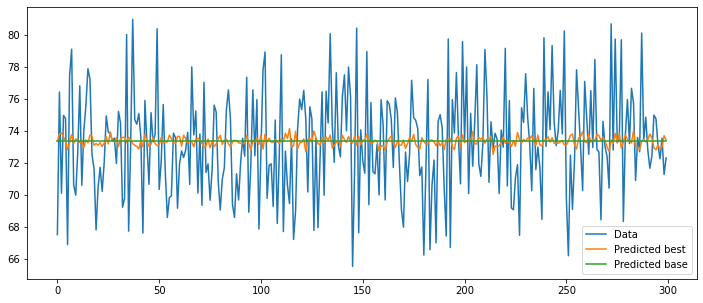

In [52]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y1_test, label='Data')
ax.plot(y1_pred_best, label='Predicted best')
ax.plot(y1_pred_base, label='Predicted base')
ax.legend()
plt.show()

### Модель для прочности при растяжении, МПа

In [53]:
# Разделяем на тренировочную и тестовую выборку
x2_train_raw, x2_test_raw, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=RANDOM_STATE)
print('x2_train:', x2_train_raw.shape, 'y2_train:', y2_train.shape)
print('x2_test:', x2_test_raw.shape, 'y2_test:', y2_test.shape)

x2_train: (700, 11) y2_train: (700, 1)
x2_test: (300, 11) y2_test: (300, 1)


In [54]:
# Выполняю препроцессинг входных переменных
x2_test = preprocessor2.fit_transform(x2_test_raw)
x2_train = preprocessor2.fit_transform(x2_train_raw)

In [55]:
# Описательная статистика входных данных до предобработки
show_statistics(x2_train_raw)

In [56]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x2_train, columns=(x2_continuous + x_categorical)))

In [57]:
# Описательная статистика выходной переменной
show_statistics(y2_train)

In [58]:
# Выходная переменная преобразованиям не подвергается
y2_train = y2_train['Прочность при растяжении, МПа'].values
y2_test = y2_test['Прочность при растяжении, МПа'].values

In [59]:
# Запускаю различные модели с параметрами по умолчанию

models2 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'SGDRegressor': SGDRegressor(random_state=RANDOM_STATE),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=RANDOM_STATE)    
}

stat2 = run_models(models2, x2_train, y2_train)
stat2.style.highlight_max(axis=0)

In [60]:
# Попробую подобрать параметры для модели Ridge
params2 = {'alpha': [0.1, 1.0, 100, 500, 700, 900, 1000, 1100, 1200, 1300, 1500, 2000]}
stat2 = run_grid_search(Ridge(), params2, x2_train, y2_train)
stat2[stat2['rank']==1]

params        RMSE  rank
9  {'alpha': 1300} -484.157777     1

In [61]:
# Попробую подобрать параметры для модели Lasso
params2 = {'alpha': [0.01, 0.1,  1.0, 1.5, 2, 5, 10, 20, 30, 50, 100]}
stat2 = run_grid_search(Lasso(), params2, x2_train, y2_train)
stat2[stat2['rank']==1]

params        RMSE  rank
8  {'alpha': 30} -484.461496     1

In [62]:
# Попробую подобрать параметры для модели SVR
params2 = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.1, 0.5, 1] }
stat2 = run_grid_search(SVR(), params2, x2_train, y2_train)
stat2[stat2['rank']==1]

params        RMSE  rank
6  {'C': 0.5, 'kernel': 'linear'} -484.132107     1

In [63]:
# Попробую подобрать параметры для модели SGDRegressor
params2 = {'penalty': ['l2', 'l1', 'elasticnet'],
           'alpha': [0.001, 0.01, 1.0, 10, 15, 20, 25, 30],
           'l1_ratio': [ 0.1, 0.25, 0.5, 0.75, 1]}
stat2 = run_grid_search(SGDRegressor(random_state=RANDOM_STATE), params2, x2_train, y2_train)
stat2[stat2['rank']==1]

params        RMSE  rank
30   {'alpha': 1.0, 'l1_ratio': 0.1, 'penalty': 'l2'} -483.938722     1
33  {'alpha': 1.0, 'l1_ratio': 0.25, 'penalty': 'l2'} -483.938722     1
36   {'alpha': 1.0, 'l1_ratio': 0.5, 'penalty': 'l2'} -483.938722     1
39  {'alpha': 1.0, 'l1_ratio': 0.75, 'penalty': 'l2'} -483.938722     1
42     {'alpha': 1.0, 'l1_ratio': 1, 'penalty': 'l2'} -483.938722     1

In [64]:
# Попробую подобрать параметры для модели GradientBoostingRegressor
params2 = {
    'loss': ['squared_error', 'absolute_error'], 
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2],
    'max_features': [1, 2, 5, 11]
}
stat2 = run_grid_search(GradientBoostingRegressor(random_state=RANDOM_STATE), params2, x2_train, y2_train)
stat2[stat2['rank']==1]

params  \
0  {'loss': 'squared_error', 'max_depth': 1, 'max_features': 1, 'n_estimators': 50}   

         RMSE  rank  
0 -483.026609     1

In [65]:
# Сравнение моделей с подобранными параметрами, поиск лучшей

models2 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'Ridge(alpha=1300)': Ridge(alpha=1300),
    'Lasso(alpha=30)': Lasso(alpha=30),
    'SVR(C=0.5, kernel=linear)': SVR(C=0.5, kernel='linear'),
    'SGDRegressor(alpha=1.0, l1_ratio=0.1, penalty=l2)': SGDRegressor(random_state=RANDOM_STATE, alpha=1.0, l1_ratio=0.1, penalty='l2'),
    'GradientBoostingRegressor(loss=squared_error, max_depth=1, max_features=1, n_estimators=50)': GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=50)
}

stat2 = run_models(models2, x2_train, y2_train)
stat2.style.highlight_max(axis=0)

Так же попробовала несколько линейных моделей и ансамбли. Результаты аналогичны полученным в предыдущем подразделе, за исключением того, что здесь я попробовала GradientBoosting. После подбора параметров он оказался немного лучше остальных моделей. Но по-прежнему крайне плохо описывает исходные данные и не может применяться в рабочем приложении.

In [66]:
# Предсказание базовой модели
base_model2 = DummyRegressor(strategy='mean')
base_model2.fit(x2_train, y2_train)
y2_pred_base = base_model2.predict(x2_test)

In [67]:
# Предсказание лучшей модели
best_model2 = GradientBoostingRegressor(loss='squared_error', max_depth=1, max_features=1, n_estimators=50)
best_model2.fit(x2_train, y2_train)
y2_pred_best = best_model2.predict(x2_test)

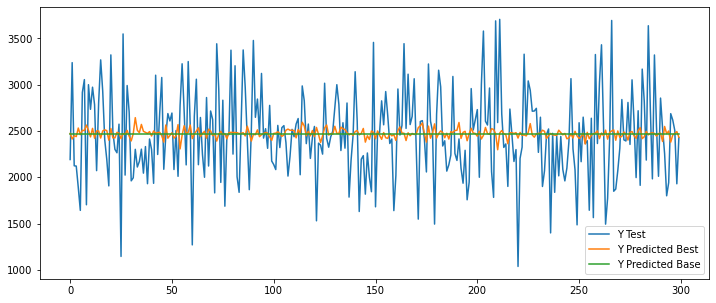

In [68]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(y2_test, label='Y Test')
ax.plot(y2_pred_best, label='Y Predicted Best')
ax.plot(y2_pred_base, label='Y Predicted Base')
ax.legend()
plt.show()

### Модель для соотношения матрица-наполнитель

In [69]:
# Разделяем на тренировочную и тестовую выборку
x3_train_raw, x3_test_raw, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=RANDOM_STATE)
print('x3_train:', x3_train_raw.shape, 'y3_train:', y3_train.shape)
print('x3_test:', x3_test_raw.shape, 'y3_test:', y3_test.shape)

x3_train: (700, 12) y3_train: (700, 1)
x3_test: (300, 12) y3_test: (300, 1)


In [70]:
# Выполняю препроцессинг входных переменных
x3_test = preprocessor3.fit_transform(x3_test_raw)
x3_train = preprocessor3.fit_transform(x3_train_raw)

In [71]:
# Описательная статистика входных данных до предобработки
show_statistics(x3_train_raw)

In [72]:
# Описательная статистика входных данных после предобработки
show_statistics(pd.DataFrame(x3_train, columns=(x3_continuous + x_categorical)))

In [73]:
# Описательная статистика выходной переменной
show_statistics(y3_train)

In [74]:
# Выходная переменная преобразованиям не подвергается
y3_train = y3_train['Соотношение матрица-наполнитель'].values
y3_test = y3_test['Соотношение матрица-наполнитель'].values

In [75]:
# Запускаю линейную и базовую модели

models3 = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression()
}

stat3 = run_models(models3, x3_train, y3_train)
stat3.style.highlight_max(axis=0)

In [76]:
# Предсказание базовой модели
base_model3 = DummyRegressor(strategy='mean')
base_model3.fit(x3_train, y3_train)
y3_pred_base = base_model3.predict(x3_test)

Видно, что зависимость нелинейная. Возможно, использование нейросетей поможет решить задачу.

Попробую модель MLPRegressor из библиотеки sklearn.

In [77]:
from sklearn.neural_network import MLPRegressor

In [78]:
# Настраиваю нейросеть
model3_2 = MLPRegressor(
    hidden_layer_sizes = (24, 12, 6),
    activation = 'relu',
    solver='adam',
    max_iter=5000,
    early_stopping = True,
    validation_fraction = 0.3,
    random_state=RANDOM_STATE, 
    verbose=True
)

In [79]:
%%time
# Запускаю нейросеть
model3_2.fit(x3_train, y3_train)

Iteration 1, loss = 6.93999382
Validation score: -15.598203
Iteration 2, loss = 6.63647507
Validation score: -14.901110
Iteration 3, loss = 6.34516184
Validation score: -14.218119
Iteration 4, loss = 6.05839853
Validation score: -13.551203
Iteration 5, loss = 5.78292997
Validation score: -12.901001
Iteration 6, loss = 5.51834066
Validation score: -12.274010
Iteration 7, loss = 5.25842244
Validation score: -11.666294
Iteration 8, loss = 5.00746172
Validation score: -11.078653
Iteration 9, loss = 4.76338234
Validation score: -10.507208
Iteration 10, loss = 4.52813793
Validation score: -9.947897
Iteration 11, loss = 4.29967100
Validation score: -9.401901
Iteration 12, loss = 4.07387777
Validation score: -8.867164
Iteration 13, loss = 3.85574860
Validation score: -8.341217
Iteration 14, loss = 3.64295791
Validation score: -7.824582
Iteration 15, loss = 3.43135209
Validation score: -7.318817
Iteration 16, loss = 3.22474875
Validation score: -6.821437
Iteration 17, loss = 3.02294313
Validati

Iteration 147, loss = 0.41673379
Validation score: -0.390415
Iteration 148, loss = 0.41537420
Validation score: -0.389430
Iteration 149, loss = 0.41409283
Validation score: -0.388283
Iteration 150, loss = 0.41281303
Validation score: -0.386846
Iteration 151, loss = 0.41150474
Validation score: -0.384863
Iteration 152, loss = 0.40992906
Validation score: -0.381189
Iteration 153, loss = 0.40880745
Validation score: -0.377847
Iteration 154, loss = 0.40758792
Validation score: -0.376023
Iteration 155, loss = 0.40630418
Validation score: -0.373869
Iteration 156, loss = 0.40518329
Validation score: -0.372213
Iteration 157, loss = 0.40378412
Validation score: -0.371834
Iteration 158, loss = 0.40240167
Validation score: -0.372456
Iteration 159, loss = 0.40125904
Validation score: -0.373612
Iteration 160, loss = 0.39984947
Validation score: -0.373194
Iteration 161, loss = 0.39868542
Validation score: -0.372872
Iteration 162, loss = 0.39739915
Validation score: -0.372762
Iteration 163, loss = 0.

MLPRegressor(early_stopping=True, hidden_layer_sizes=(24, 12, 6), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

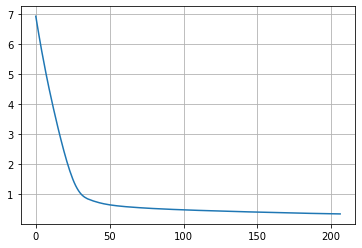

In [80]:
# График ошибки
plt.plot(model3_2.loss_curve_)
plt.grid(True)
plt.show()

In [81]:
# Предсказание
y3_pred_skl = model3_2.predict(x3_test)

In [82]:
# Метрики
get_metrics('sklearn MLPRegressor', y3_test, y3_pred_skl)

R2      RMSE       MAE      MAPE  max_error
sklearn MLPRegressor -0.317166 -1.039991 -0.839098 -0.338103  -3.602819

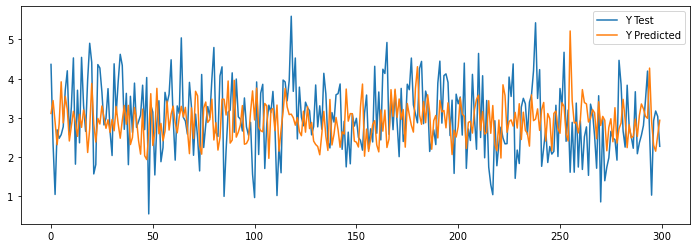

In [83]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Y Test')
ax.plot(y3_pred_skl, label='Y Predicted')
ax.legend()
plt.show()

Нейросеть, построенная с помощью MLPRegressor, возвращает данные, похожие на исходные. Но ошибка  по всем метрикам значительно хуже, чем у линейных моделей. Возможно, ошибку можно уменьшить, экспериментируя со структурой нейросети.

In [84]:
# Попробую построить нейронную сеть с помощью библиотеки TensorFlow.

In [121]:
# Импорт библиотеки TensorFlow
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.8.0


In [122]:
# Собираю нейросеть
model3_3 = tf.keras.Sequential([
  keras.layers.Input(shape=(12,)),                   # Входной слой, уже нормализованный раньше
  keras.layers.Dense(units=24, activation='relu'),   # Скрытый слой
  keras.layers.Dense(units=12, activation='relu'),   # Скрытый слой
  keras.layers.Dense(units=6, activation='relu'),    # Скрытый слой
  keras.layers.Dense(units=1)                        # Выходной слой
])

In [124]:
# Настройка нейросети
model3_3.compile(
  optimizer=keras.optimizers.Adam(),
  loss=keras.losses.MeanAbsolutePercentageError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [125]:
# Сводная информация по архитектуре сети
model3_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________


In [126]:
%%time
# Обучение нейросети
history = model3_3.fit(
  x3_train, 
  y3_train, 
  epochs=50, 
  validation_split=0.3, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

Epoch 1/50
16/16 [==============================] - 2s 19ms/step - loss: 96.0914 - root_mean_squared_error: 2.9450 - val_loss: 92.4034 - val_root_mean_squared_error: 2.8828
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 89.5913 - root_mean_squared_error: 2.7883 - val_loss: 85.3641 - val_root_mean_squared_error: 2.7105
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 81.7817 - root_mean_squared_error: 2.5976 - val_loss: 76.3798 - val_root_mean_squared_error: 2.4898
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 71.6410 - root_mean_squared_error: 2.3515 - val_loss: 64.8506 - val_root_mean_squared_error: 2.1967
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 59.3315 - root_mean_squared_error: 2.0323 - val_loss: 51.7651 - val_root_mean_squared_error: 1.8388
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 46.1541 - root_mean_squared_error: 1.6526 - val_loss: 39.6182 - val

In [127]:
# Как шло обучение
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(5)

loss  root_mean_squared_error   val_loss  \
19  30.994526                 1.072775  32.797230   
20  30.807795                 1.068720  32.746719   
21  30.678026                 1.071034  32.749855   
22  30.636814                 1.080106  32.812820   
23  30.431425                 1.057423  32.753132   

    val_root_mean_squared_error  epoch  
19                     1.119475     19  
20                     1.114665     20  
21                     1.120768     21  
22                     1.117885     22  
23                     1.116174     23

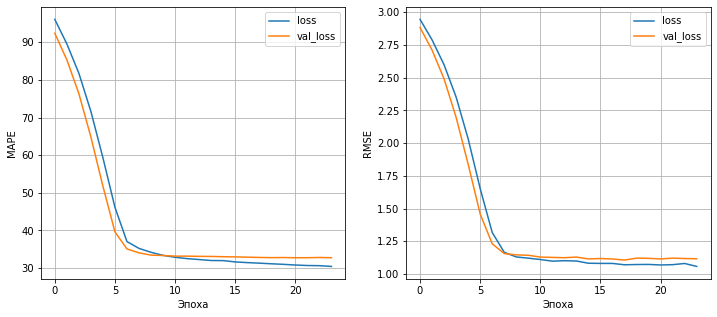

In [128]:
# График ошибки
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['loss'], label='loss')
axes[0].plot(history.history['val_loss'], label='val_loss')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('MAPE')
axes[0].legend()
axes[0].grid(True)
axes[1].plot(history.history['root_mean_squared_error'], label='loss')
axes[1].plot(history.history['val_root_mean_squared_error'], label='val_loss')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True)
plt.show()

In [129]:
# Предсказание
y3_pred_keras = model3_3.predict(x3_test)

In [130]:
# Метрики
get_metrics('keras model', y3_test, y3_pred_keras)

R2      RMSE       MAE      MAPE  max_error
keras model -0.680949 -1.174861 -0.966267 -0.342905  -3.432976

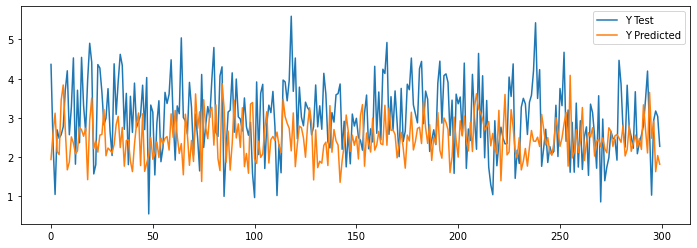

In [131]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(y3_test, label='Y Test')
ax.plot(y3_pred_keras, label='Y Predicted')
ax.legend()
plt.show()

Ситуация аналогична MLPRegressor - результат модели похож на исходные данные. Но ошибка по любой из метрик выше, чем у базовой модели и линейной модели. Нейросеть, построенная с помощь TensorFlow, чуть лучше подстроилась к исходным данным, чем MLPRegressor, при одинаковом количестве слоев и нейронов.

## Разработать приложение 

Разработать приложение с графическим интерфейсом или интерфейсом командной строки, которое будет выдавать прогноз, полученный в задании 4 или 5 (один или два прогноза, на выбор учащегося).

Для разбработки приложения выбран Python и фреймворк Flask. Для использования в приложении обученных моделей их надо сохранить.

In [96]:
def save_object_with_pickle(obj, obj_name):
  filename = models_path + obj_name
  file = open(filename, 'wb')
  pickle.dump(obj, file)
  file.close()

In [97]:
save_object_with_pickle(preprocessor1, 'preprocessor1')

In [98]:
save_object_with_pickle(best_model1, 'model1_best')

In [99]:
save_object_with_pickle(preprocessor2, 'preprocessor2')

In [100]:
save_object_with_pickle(best_model2, 'model2_best')

In [101]:
save_object_with_pickle(preprocessor3, 'preprocessor3')

In [102]:
save_object_with_pickle(model3_2, 'model3_2')

In [103]:
# Примеры для тестирования модели в приложении для задач 1 и 2

In [104]:
# Вход
x1.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [105]:
# Выход
sample_x = preprocessor1.transform(x1.iloc[[19], :])
best_model1.predict(sample_x)

array([73.62282622])

In [106]:
# Вход
x2.iloc[19, :].values.astype(str)

array(['4.02912621359223', '1880.0', '622.0', '111.86',
       '22.2678571428571', '284.615384615384', '470.0', '220.0', '90.0',
       '4.0', '60.0'], dtype='<U32')

In [107]:
# Выход
sample_x = preprocessor2.transform(x2.iloc[[19], :])
best_model2.predict(sample_x)

array([2564.74752129])

In [108]:
# Примеры для тестирования модели в приложении для задачи 3

In [109]:
# Вход
x3.iloc[19, :].values.astype(str)

array(['1880.0', '622.0', '111.86', '22.2678571428571',
       '284.615384615384', '470.0', '73.3333333333333',
       '2455.55555555555', '220.0', '90.0', '4.0', '60.0'], dtype='<U32')

In [110]:
# Выход
sample_x = preprocessor3.transform(x3.iloc[[19], :])
model3_2.predict(sample_x)

array([1.91201925])

## Оценить точность модели на тренировочном и тестовом датасете

### Модель для модуля упругости при растяжении

In [111]:
best_model1

Ridge(alpha=500)

In [112]:
stat1 = pd.DataFrame()
y1_pred_train = best_model1.predict(x1_train)
stat1 = pd.concat([stat1, get_metrics('Модуль упругости, тренировочный', y1_train, y1_pred_train)])
y1_pred_test = best_model1.predict(x1_test)
stat1 = pd.concat([stat1, get_metrics('Модуль упругости, тестовый', y1_test, y1_pred_test)])
stat1

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.024416 -3.026259 -2.432020 -0.033195   
Модуль упругости, тестовый      -0.003852 -3.226935 -2.596791 -0.035583   

                                 max_error  
Модуль упругости, тренировочный  -9.133096  
Модуль упругости, тестовый       -7.749480

Гребневая регрессия (линейная модель) даже на тренировочном датасете не смогла обучиться и приблизиться к исходным данным. Поэтому ошибка на тестовом датасете выше, чем на тренировочном, но несущественно.

### Модель для прочности при растяжении

In [113]:
best_model2

GradientBoostingRegressor(max_depth=1, max_features=1, n_estimators=50)

In [114]:
stat2 = pd.DataFrame()
y2_pred_train = best_model2.predict(x2_train)
stat2 = pd.concat([stat2, get_metrics('Модуль упругости, тренировочный', y2_train, y2_pred_train)])
y2_pred_test = best_model2.predict(x2_test)
stat2 = pd.concat([stat2, get_metrics('Модуль упругости, тестовый', y2_test, y2_pred_test)])
stat2

R2        RMSE         MAE      MAPE  \
Модуль упругости, тренировочный  0.060040 -472.104824 -374.261023 -0.164616   
Модуль упругости, тестовый      -0.005716 -480.935535 -378.805085 -0.167209   

                                  max_error  
Модуль упругости, тренировочный -1403.10452  
Модуль упругости, тестовый      -1386.75723

Градиентный бустинг на тренировочном датасете тоже не смог хорошо подстроиться под данные модели. Поэтому ошибка на тестовом датасете выше, чем на тренировочном, но незначительно.

### Модель для соотношения матрица-наполнитель

In [115]:
model3_2

MLPRegressor(early_stopping=True, hidden_layer_sizes=(24, 12, 6), max_iter=5000,
             random_state=3128, validation_fraction=0.3, verbose=True)

In [117]:
stat3 = pd.DataFrame()
y3_pred_train = model3_2.predict(x3_train)
stat3 = pd.concat([stat3, get_metrics('Модуль упругости, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_2.predict(x3_test)
stat3 = pd.concat([stat3, get_metrics('Модуль упругости, тестовый', y3_test, y3_pred_test)])
stat3

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный  0.003634 -0.906068 -0.722572 -0.308896   
Модуль упругости, тестовый      -0.317166 -1.039991 -0.839098 -0.338103   

                                 max_error  
Модуль упругости, тренировочный  -2.826424  
Модуль упругости, тестовый       -3.602819

In [132]:
model3_3

In [133]:
stat3 = pd.DataFrame()
y3_pred_train = model3_3.predict(x3_train)
stat3 = pd.concat([stat3, get_metrics('Модуль упругости, тренировочный', y3_train, y3_pred_train)])
y3_pred_test = model3_3.predict(x3_test)
stat3 = pd.concat([stat3, get_metrics('Модуль упругости, тестовый', y3_test, y3_pred_test)])
stat3

R2      RMSE       MAE      MAPE  \
Модуль упругости, тренировочный -0.408239 -1.077183 -0.841315 -0.309877   
Модуль упругости, тестовый      -0.680949 -1.174861 -0.966267 -0.342905   

                                 max_error  
Модуль упругости, тренировочный  -2.903713  
Модуль упругости, тестовый       -3.432976

У нейросети показатели для тестовой выборки сильнее отличаются от показателей тренировочной. Она пыталась обучится, но не смогла -  показатели ошибки гораздо хуже, чем у статистических моделей.